In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Load data from CSV file
df = pd.read_csv('responses.csv')

list_to_drop = df.columns[0:31]
list_to_drop_2 = df.columns[63:]
df =df.drop(list_to_drop,axis=1)
df.drop(list_to_drop_2,axis=1,inplace = True)
df.dropna(axis=0,inplace = True)

df.head()

History  Psychology  Politics  Mathematics  Physics  Internet   PC  \
0      1.0         5.0       1.0          3.0      3.0       5.0  3.0   
1      1.0         3.0       4.0          5.0      2.0       4.0  4.0   
2      1.0         2.0       1.0          5.0      2.0       4.0  2.0   
3      4.0         4.0       5.0          4.0      1.0       3.0  1.0   
4      3.0         2.0       3.0          2.0      2.0       2.0  2.0   

   Economy Management  Biology  Chemistry  ...  Passive sport  Active sport  \
0                 5.0      3.0        3.0  ...            1.0           5.0   
1                 5.0      1.0        1.0  ...            1.0           1.0   
2                 4.0      1.0        1.0  ...            5.0           2.0   
3                 2.0      3.0        3.0  ...            1.0           1.0   
4                 2.0      3.0        3.0  ...            3.0           1.0   

   Gardening  Celebrities  Shopping  Science and technology  Theatre  \
0        5.0          1.0       4.0                     4.0      2.0   
1        1.0          2.0       3.0                     3.0      2.0   
2        1.0          1.0       4.0                     2.0      5.0   
3        1.0          2.0       4.0                     3.0      1.0   
4        4.0          3.0       3.0                     3.0      2.0   

   Fun with friends  Adrenaline sports  Pets  
0               5.0                4.0   4.0  
1               4.0                2.0   5.0  
2               5.0                5.0   5.0  
3               2.0                1.0   1.0  
4               4.0                2.0   1.0  

[5 rows x 32 columns]

# Split the Data

In [ ]:
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import linkage, fcluster
import numpy as np

# Split the data into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.3, random_state=42)

# Calculate a correlation matrix

In [ ]:
# Calculate correlation matrix
corr_matrix = train_data.corr()

print(corr_matrix)

                         History  Psychology  Politics  Mathematics   Physics  \
History                 1.000000    0.286396  0.386030     0.021743  0.092645   
Psychology              0.286396    1.000000  0.177015     0.079624  0.109129   
Politics                0.386030    0.177015  1.000000     0.127721  0.164671   
Mathematics             0.021743    0.079624  0.127721     1.000000  0.589075   
Physics                 0.092645    0.109129  0.164671     0.589075  1.000000   
Internet               -0.008124    0.023565  0.033254     0.136108  0.103646   
PC                      0.056144   -0.056056  0.140437     0.288550  0.355338   
Economy Management      0.045311    0.092288  0.293045     0.239568  0.010159   
Biology                 0.030356    0.194297 -0.047181     0.085384  0.218473   
Chemistry               0.019909    0.062375 -0.028585     0.186613  0.340575   
Reading                 0.281782    0.236058  0.093566     0.000835 -0.054166   
Geography               0.31

we created a correlation metrix, where each row and column represents a hobby, and the values in the cells represent the correlation between the hobbies.

A positive value indicates a positive correlation between the two hobbies. A positive value between two hobbies suggests that people who are interested in the first hobby are also more likely to be interested in second.

A negative value indicates a negative correlation between the two hobbies.This suggests that people who are interested in the first hobby are less likely to be interested in the second.


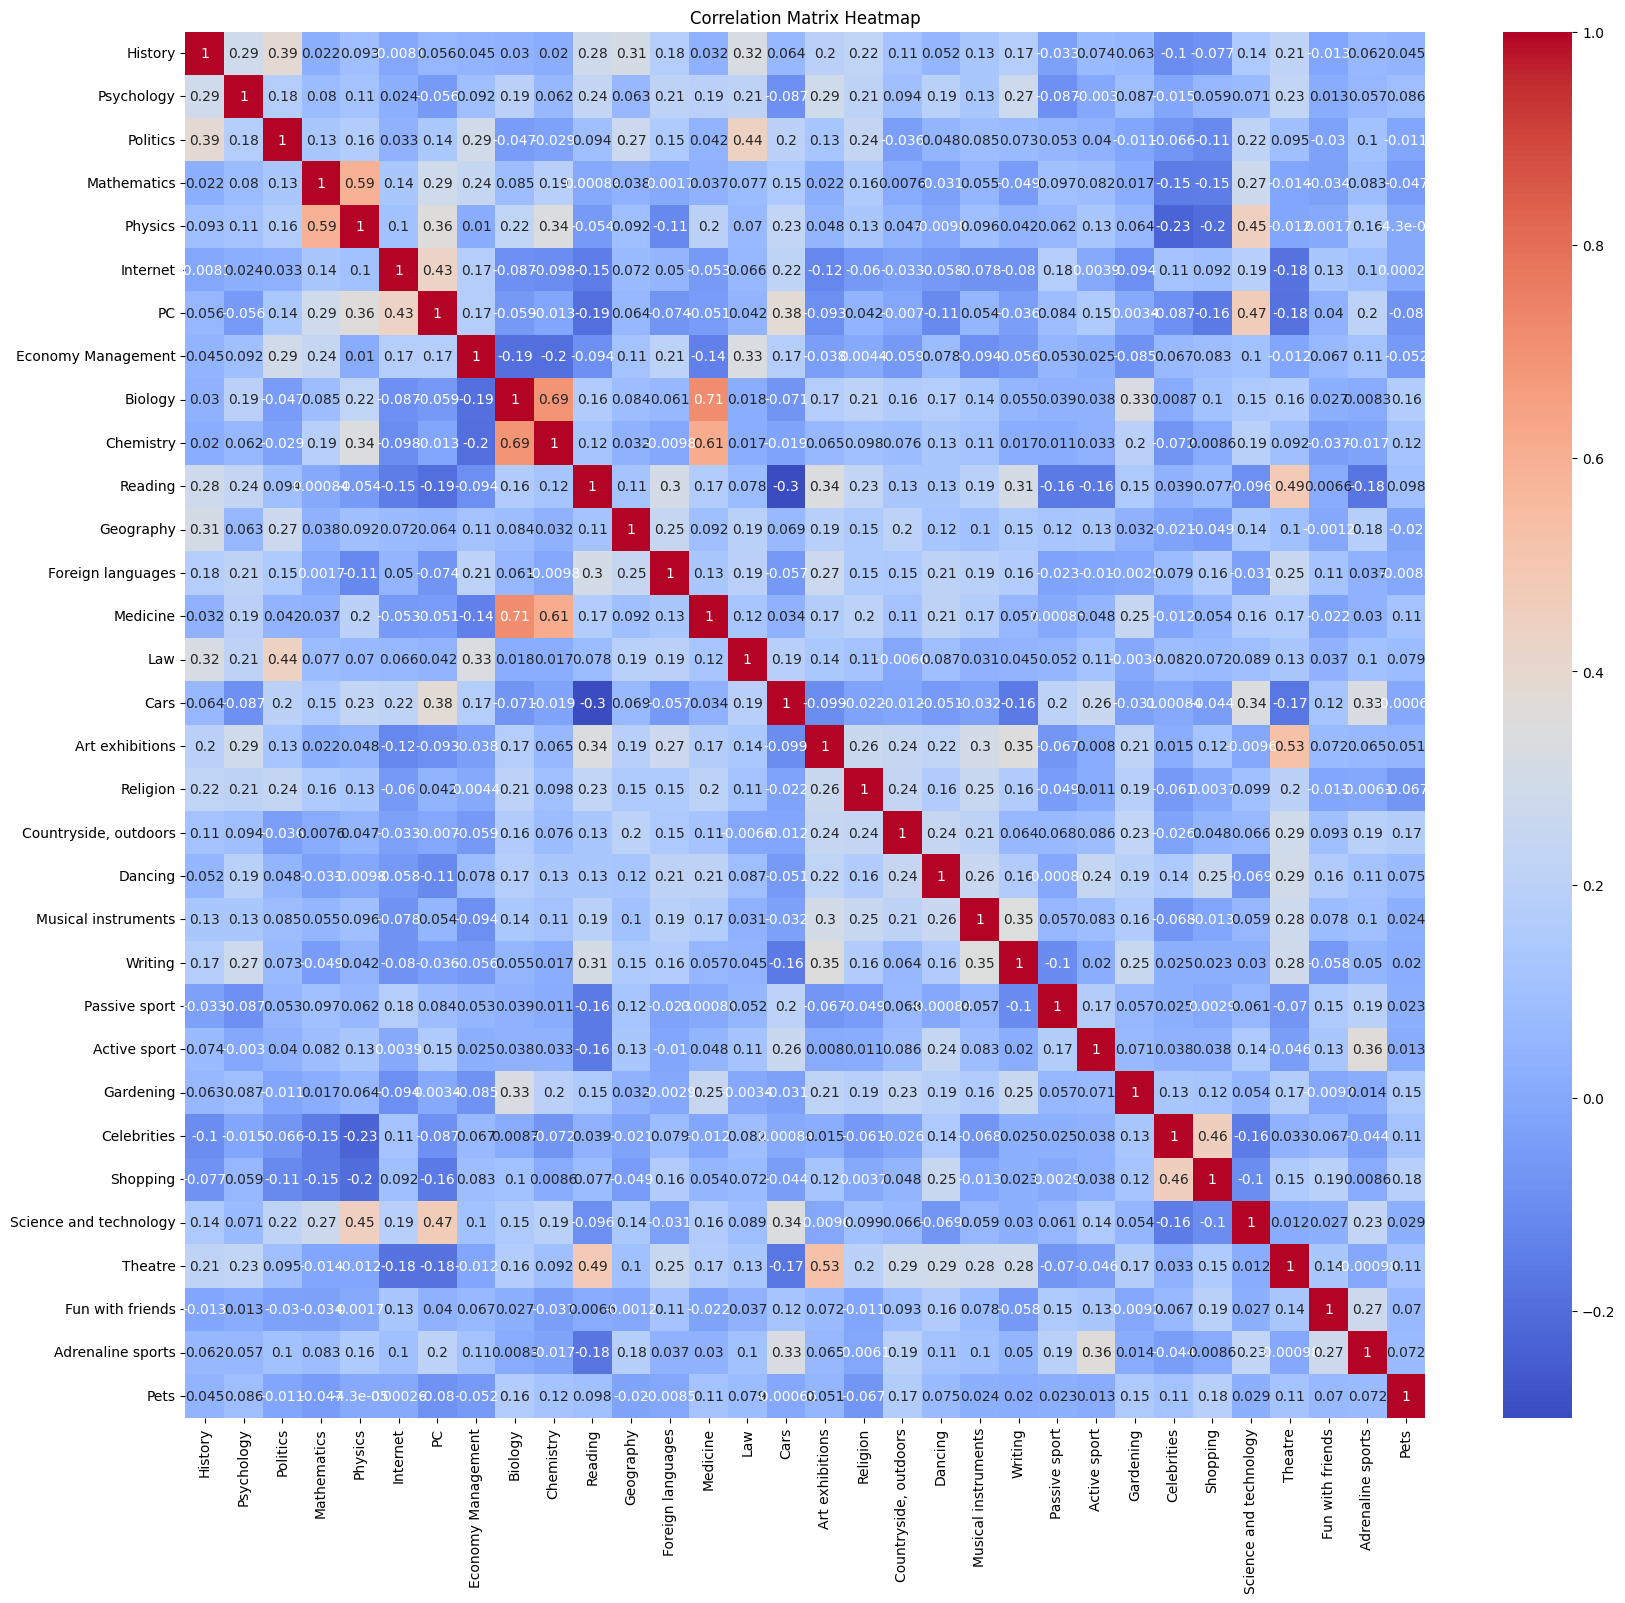

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr_matrix = train_data.corr()

# Plot heatmap
plt.figure(figsize=(20, 18))  # Increase the width to 12
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()



# Create a weighted graph

In [ ]:
import networkx as nx

# Create a graph
G = nx.Graph()

# Add nodes to the graph
for node in corr_matrix.columns:
    G.add_node(node)

# Add edges to the graph
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        weight = corr_matrix.iloc[i,j]  # get the weight from the correlation matrix
        if abs(weight) > 0.2:  # set a threshold for the weights
            G.add_edge(corr_matrix.columns[i], corr_matrix.columns[j], weight=weight)


# set edge labels
edge_labels = nx.get_edge_attributes(G, "weight")

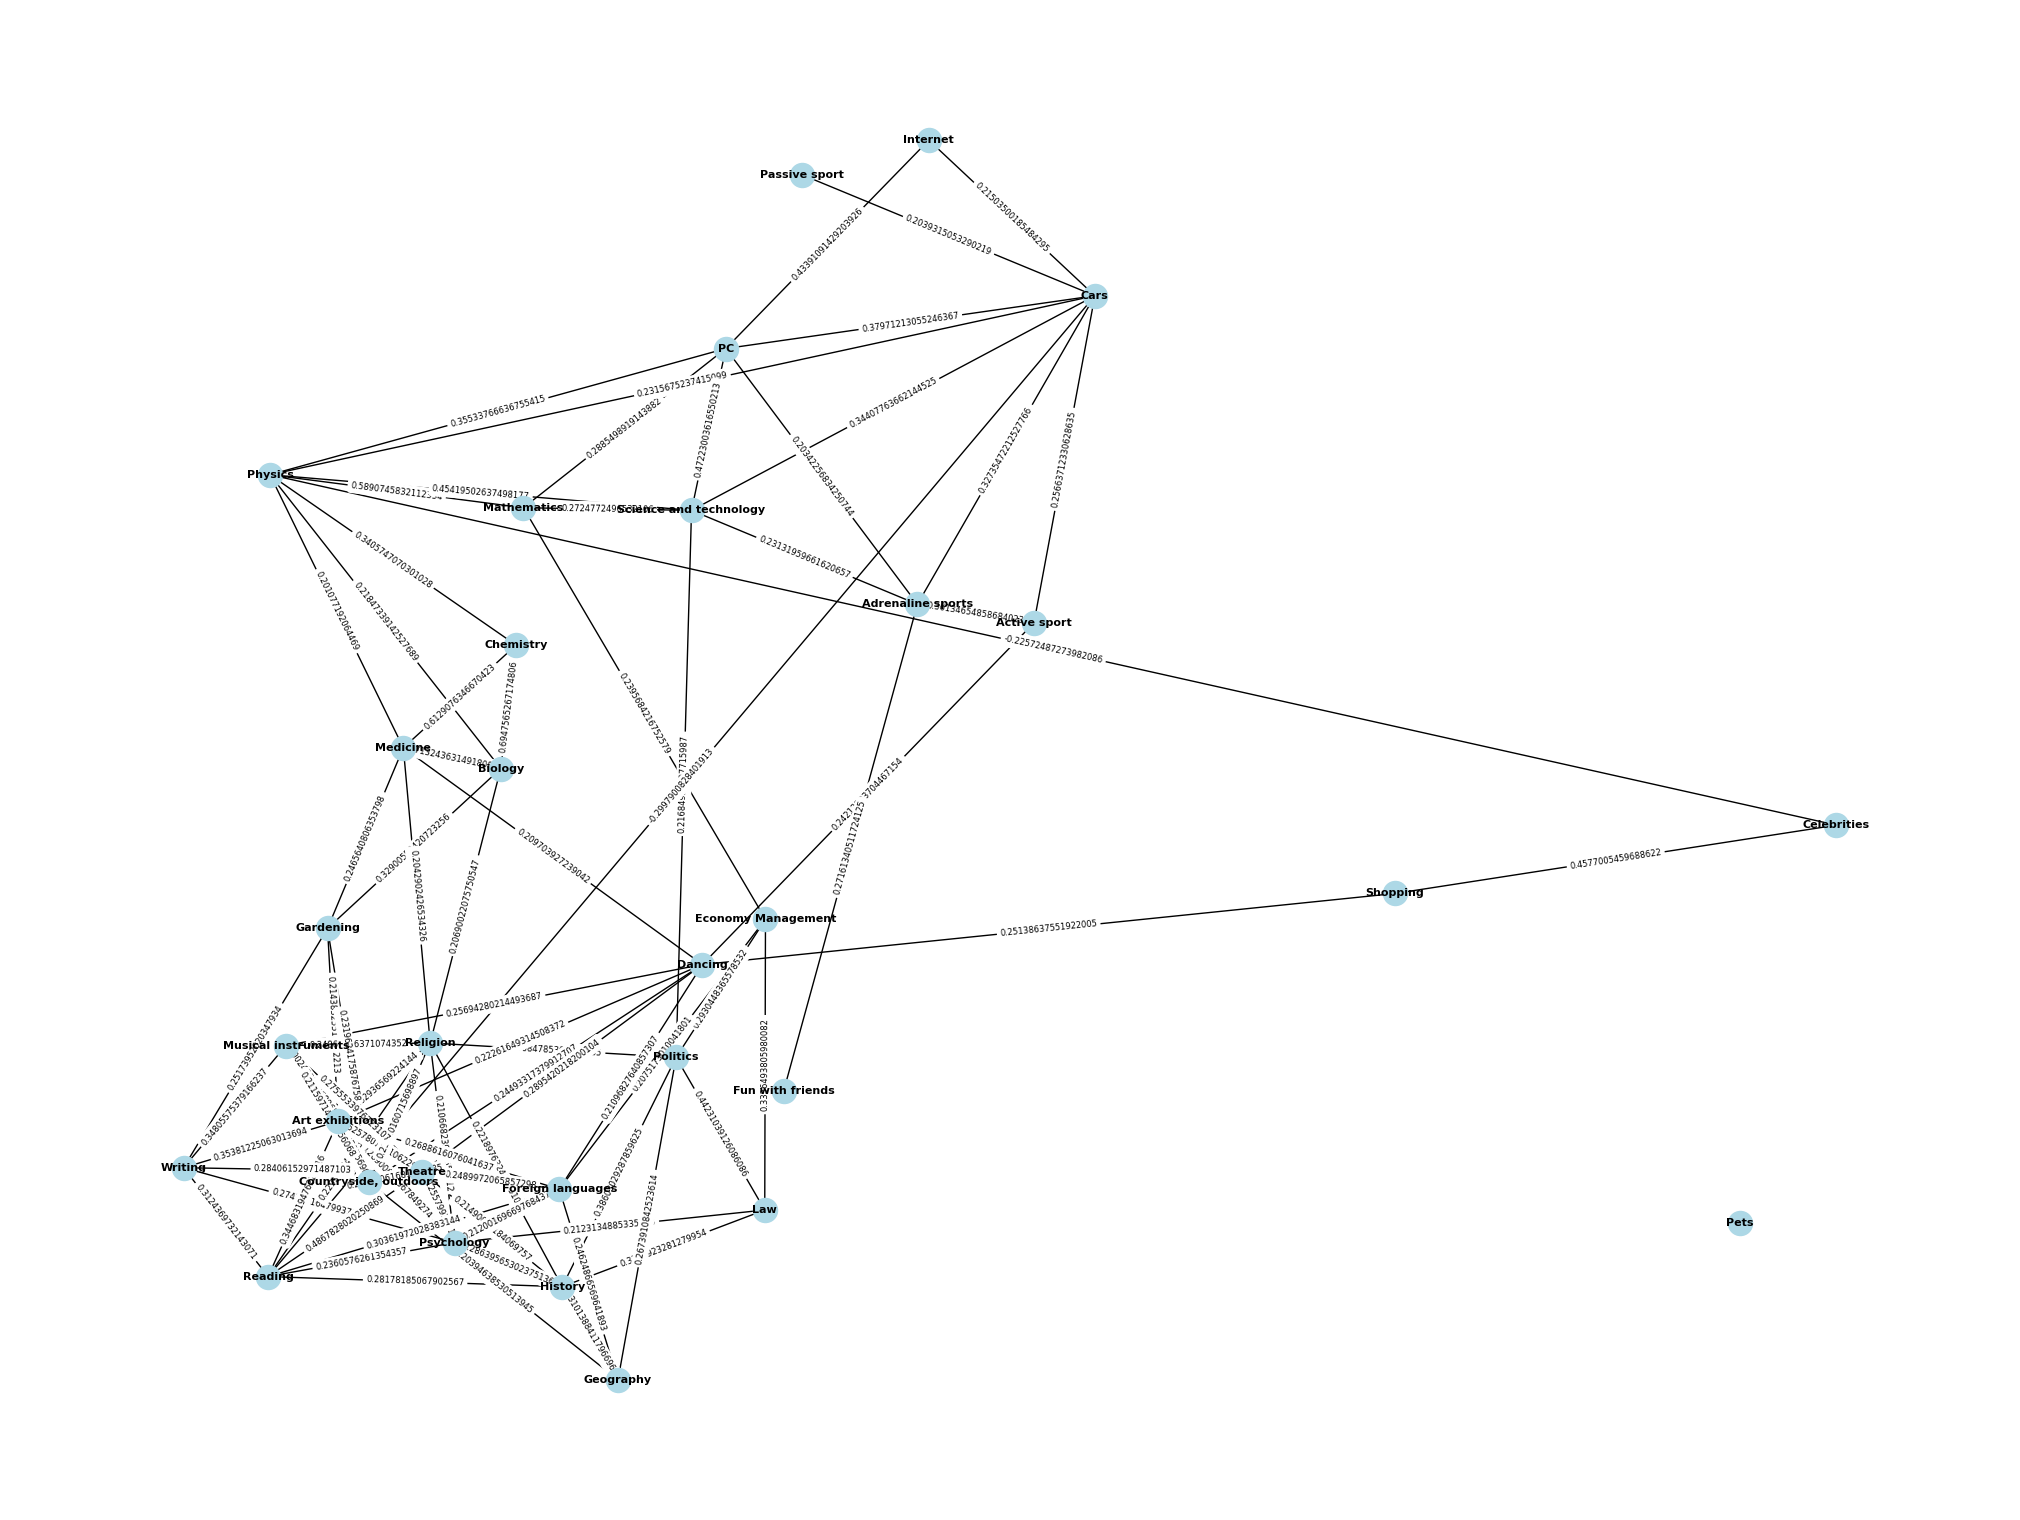

In [ ]:
# draw graph
plt.figure(figsize=(20, 15))  # increase width to 10 inches
pos = nx.spring_layout(G, k=0.3, seed=42)
nx.draw(G, pos=pos, with_labels=True, node_color="lightblue", font_size=8, font_weight="bold")
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels, font_size=6)
plt.axis("off")
plt.show()

# partition the graph into clusters of hobbies

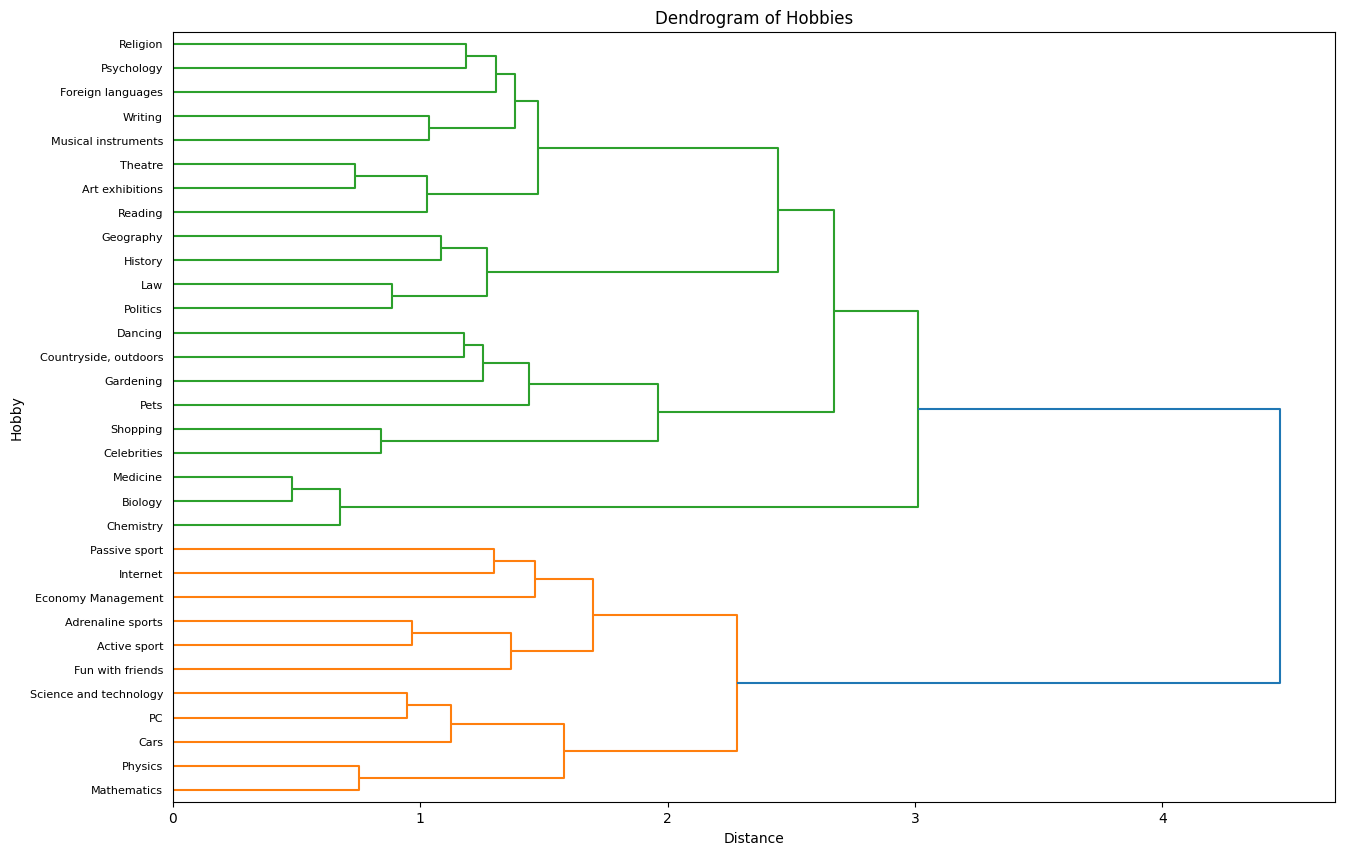

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, to_tree


# Define the linkage matrix using the ward method
Z = linkage(corr_matrix, 'ward')

# Plot the dendrogram
plt.figure(figsize=(15, 10))
dendrogram(Z, labels=corr_matrix.columns, orientation='right')

# Add labels to the plot
plt.xlabel('Distance')
plt.ylabel('Hobby')
plt.title('Dendrogram of Hobbies')

plt.show()


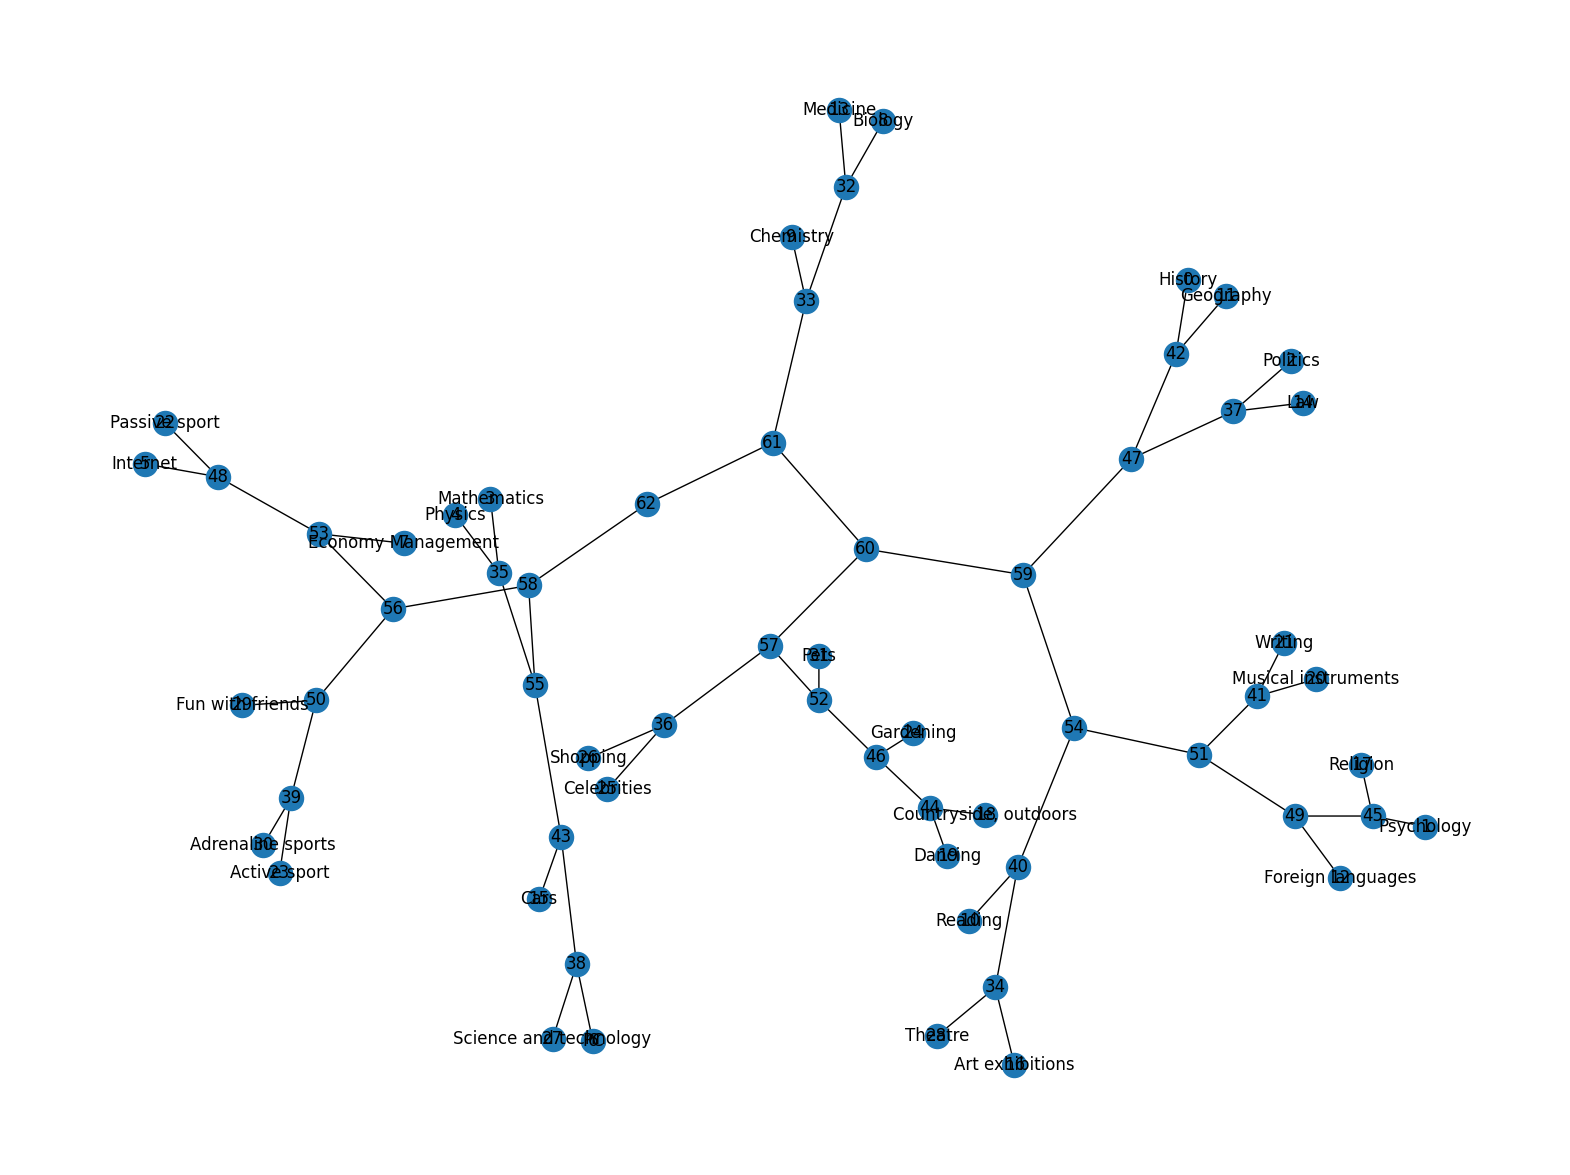

In [ ]:
tree = to_tree(Z)

# Create a graph
G1 = nx.Graph()

# Traverse the tree and create subgraphs for each cluster
def traverse_tree(node, parent_node=None):
    if node.is_leaf():
        # Add node as a subgraph to its parent
        G1.add_node(node.id, label=node.get_id())
        if parent_node is not None:
            G1.add_edge(node.id, parent_node.id)
    else:
        # Add node as a subgraph to its parent
        G1.add_node(node.id)
        if parent_node is not None:
            G1.add_edge(node.id, parent_node.id)
        # Traverse the left and right branches
        traverse_tree(node.get_left(), node)
        traverse_tree(node.get_right(), node)

# Call the traverse_tree function to create subgraphs for each cluster
traverse_tree(tree)

# Set the layout of the graph
plt.figure(figsize=(20, 15))
pos = nx.spring_layout(G1, seed=42)

# Add node labels to the subgraphs
labels = {idx: hobby for idx, hobby in enumerate(corr_matrix.columns)}
nx.draw_networkx_labels(G1, pos, labels, font_size=12, font_family='sans-serif')

# Draw the graph
nx.draw(G1, pos, with_labels=True)

# Show the graph
plt.show()

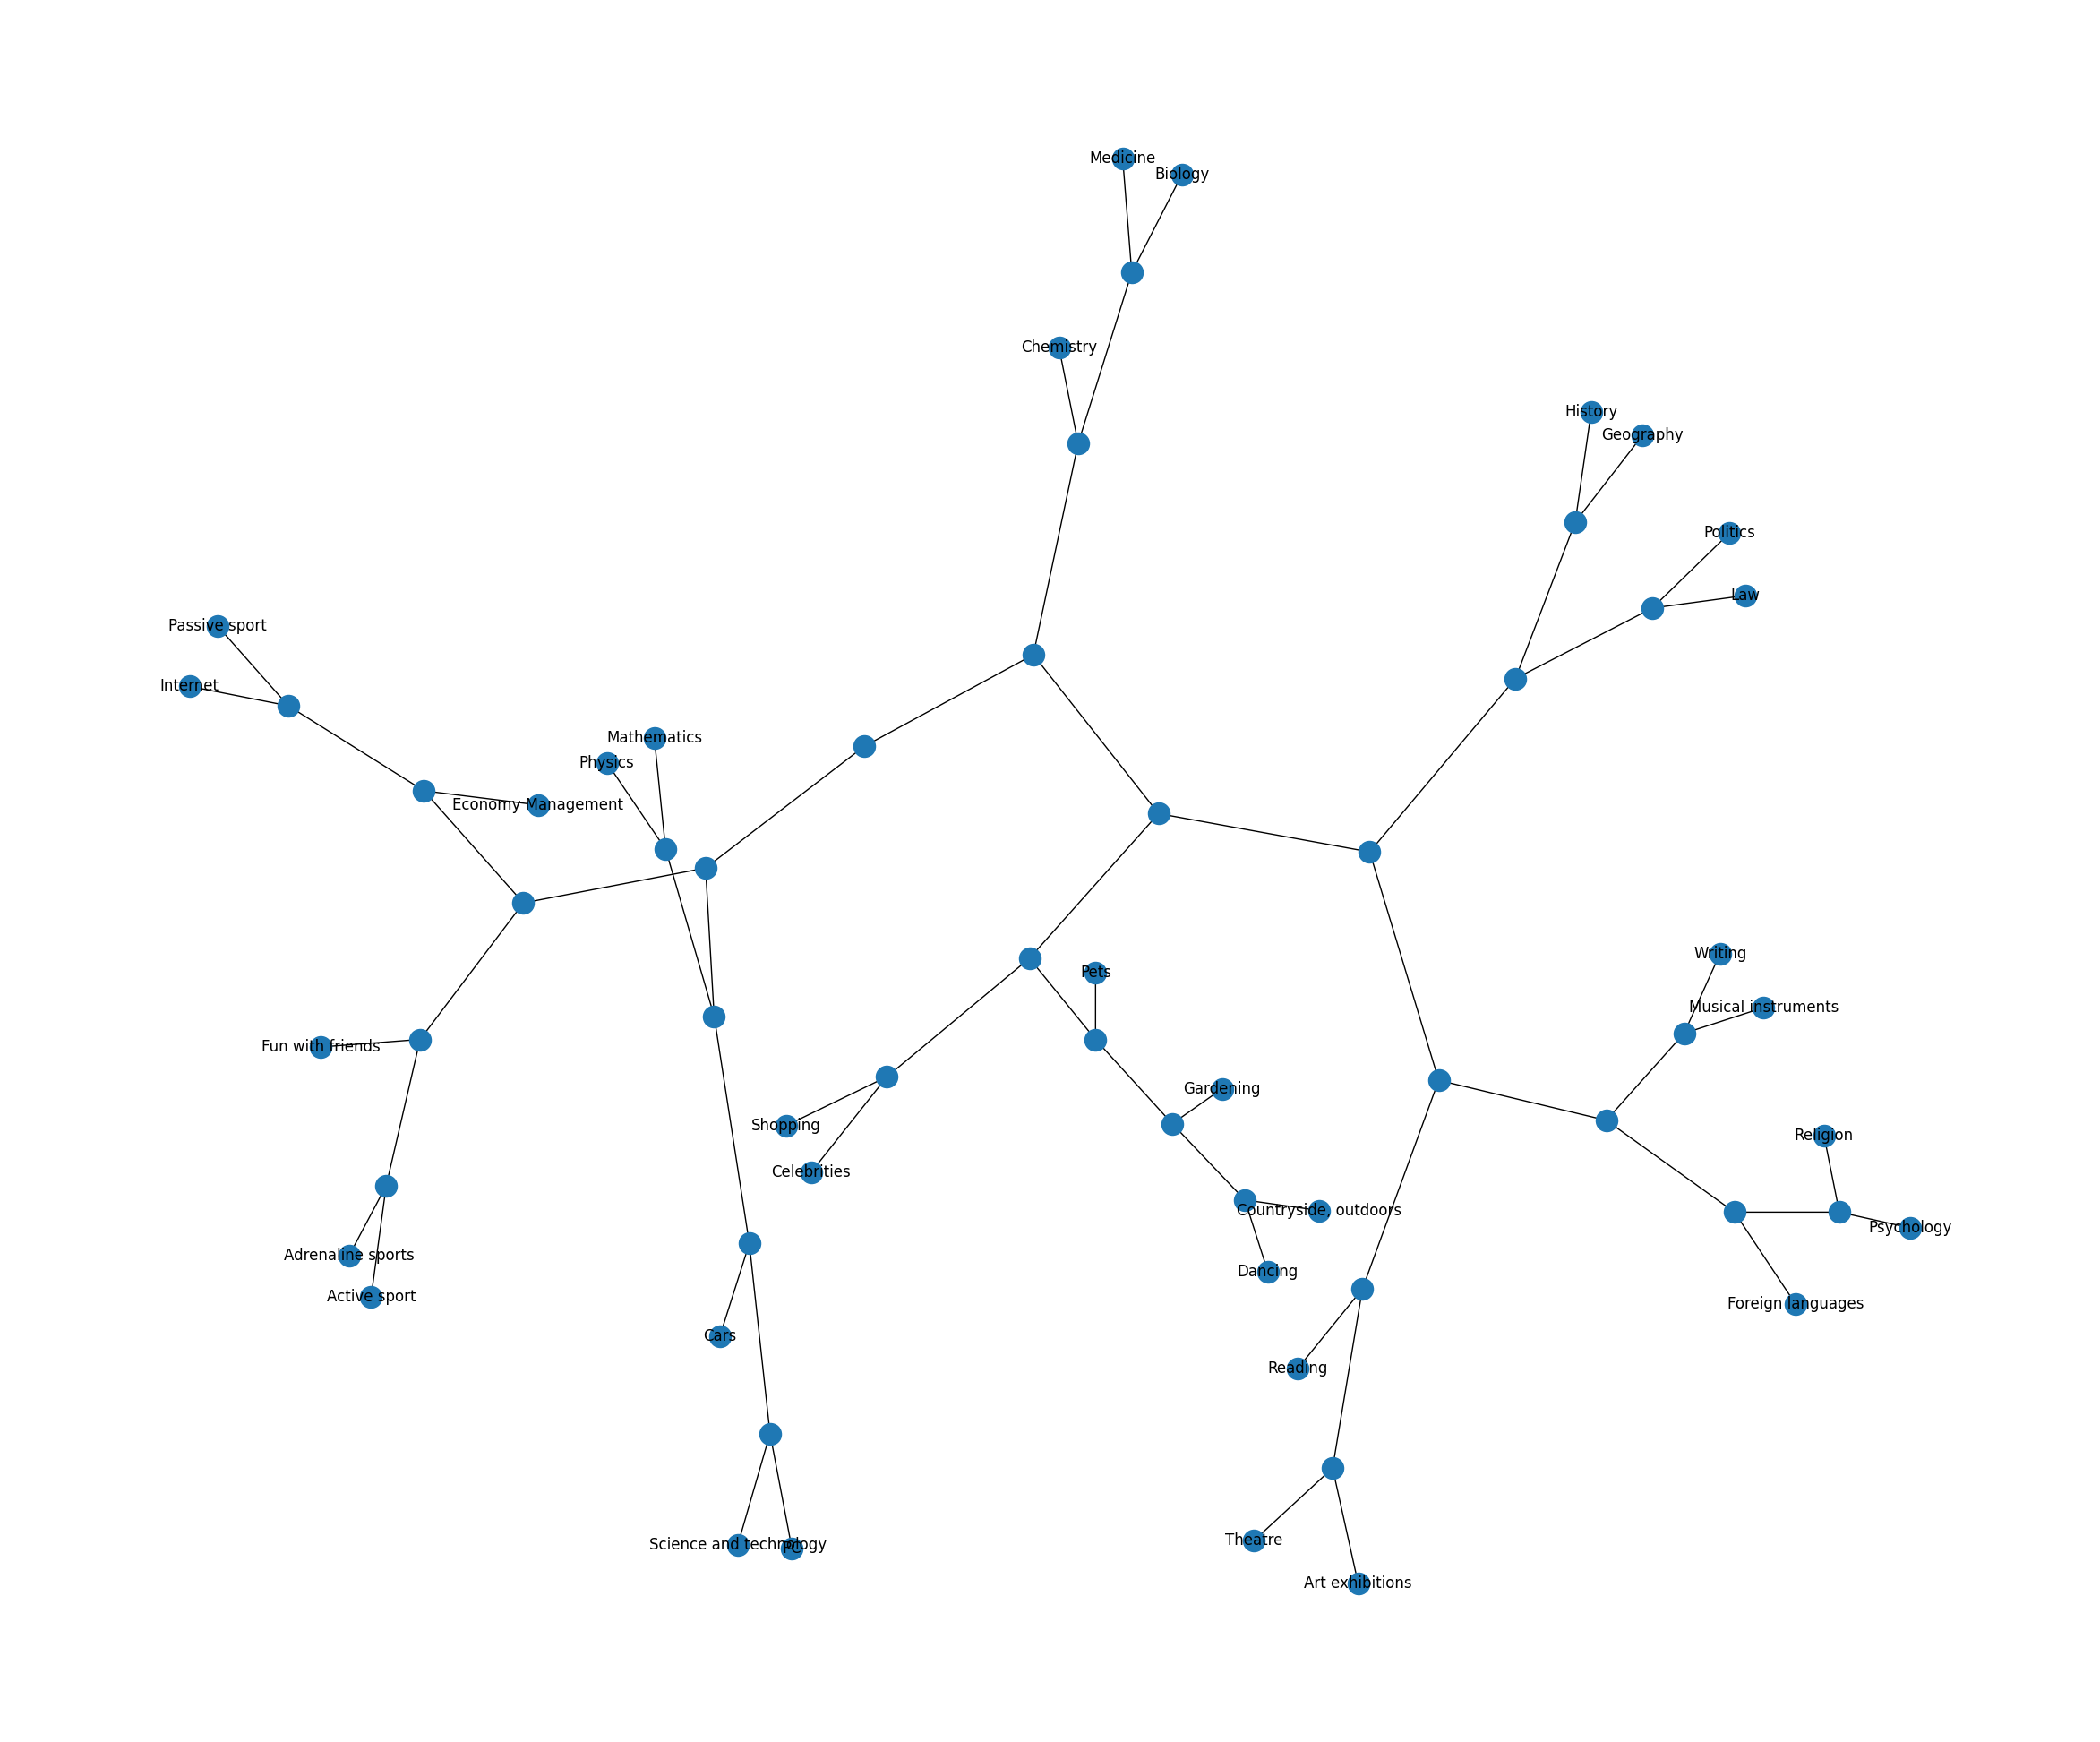

In [ ]:
tree = to_tree(Z)

# Create a graph
G2 = nx.Graph()

# Traverse the tree and create subgraphs for each cluster
def traverse_tree(node, parent_node=None):
    if node.is_leaf():
        # Add node as a subgraph to its parent
        G2.add_node(node.id, label=node.get_id())
        if parent_node is not None:
            G2.add_edge(node.id, parent_node.id)
    else:
        # Add node as a subgraph to its parent
        G2.add_node(node.id)
        if parent_node is not None:
            G2.add_edge(node.id, parent_node.id)
        # Traverse the left and right branches
        traverse_tree(node.get_left(), node)
        traverse_tree(node.get_right(), node)

# Call the traverse_tree function to create subgraphs for each cluster
traverse_tree(tree)

# Set the layout of the graph
plt.figure(figsize=(30, 25))
pos = nx.spring_layout(G2, seed=42)

# Add node labels to the subgraphs
labels = {idx: hobby for idx, hobby in enumerate(corr_matrix.columns)}
nx.draw_networkx_labels(G2, pos, labels, font_size=12, font_family='sans-serif')

# Draw the graph
nx.draw(G2, pos, with_labels=False)

# Show the graph
plt.show()

In [ ]:

# Draw the graph
plt.figure(figsize=(20, 20))
nx.draw(G2, pos, with_labels=True)

# Show the graph
plt.show()

In [ ]:
#rearrange the Graph and split into clusters

G2.add_edge(13, 33)
G2.add_edge(8, 33)

G2.remove_node(32)

G2.add_edge(50,30)
G2.add_edge(50,23)

G2.remove_node(39)

G2.add_edge(40,16)
G2.add_edge(40,28)

G2.add_edge(43,6)
G2.add_edge(43,27)

G2.add_edge(49,17)
G2.add_edge(49,1)
G2.add_edge(49,12)

G2.remove_node(34)
G2.remove_node(38)
G2.remove_node(45)

G2.add_edge(0,47)
G2.add_edge(11,47)
G2.add_edge(2,47)
G2.add_edge(14,47)

G2.remove_node(42)
G2.remove_node(37)

G2.add_edge(52,24)
G2.add_edge(52,18)
G2.add_edge(52,19)

G2.remove_node(46)
G2.remove_node(44)



In [ ]:
# Set the layout of the graph
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G2, seed=42)

# Add node labels to the subgraphs
labels = {idx: hobby for idx, hobby in enumerate(corr_matrix.columns)}
nx.draw_networkx_labels(G2, pos, labels, font_size=12, font_family='sans-serif')

# Draw the graph
nx.draw(G2, pos, with_labels=True)

# Show the graph
plt.show()

plt.savefig('graph.png')

In [ ]:
# creating dict of people recored - Train data

# Initialize an empty dictionary to store the preferred hobbies for each person
preferred_hobbies_dict = {}

# Loop over all the rows in the dataset
for person_index in train_data.index:
    # Initialize an empty list to store the person's preferred hobbies
    preferred_hobbies = []

    # Loop over all the columns in the row
    for hobby_name in df.columns:
        # Get the hobby rating for this person and hobby
        hobby_rating = df.loc[person_index, hobby_name]

        # Check if the hobby rating is over 4
        if hobby_rating >= 4:
            # Add the hobby to the person's preferred hobbies list
            preferred_hobbies.append(hobby_name)

    # Add the person's preferred hobbies to the dictionary
    preferred_hobbies_dict[person_index] = preferred_hobbies

# Print the preferred hobbies for each person
for person_index, preferred_hobbies in preferred_hobbies_dict.items():
    print(f"Person {person_index}: {preferred_hobbies}")

In [ ]:
# creating dict of people recored - Test data

# Initialize an empty dictionary to store the preferred hobbies for each person
preferred_hobbies_dict_test = {}

# Loop over all the rows in the dataset
for person_index in test_data.index:
    # Initialize an empty list to store the person's preferred hobbies
    preferred_hobbies = []

    # Loop over all the columns in the row
    for hobby_name in df.columns:
        # Get the hobby rating for this person and hobby
        hobby_rating = df.loc[person_index, hobby_name]

        # Check if the hobby rating is over 4
        if hobby_rating >= 4:
            # Add the hobby to the person's preferred hobbies list
            preferred_hobbies.append(hobby_name)

    # Add the person's preferred hobbies to the dictionary
    preferred_hobbies_dict_test[person_index] = preferred_hobbies

# Print the preferred hobbies for each person
for person_index, preferred_hobbies in preferred_hobbies_dict_test.items():
    print(f"Person {person_index}: {preferred_hobbies}")

Person 47: ['Internet', 'Economy Management', 'Reading', 'Foreign languages', 'Shopping', 'Theatre', 'Fun with friends', 'Pets']
Person 443: ['History', 'Psychology', 'Politics', 'Reading', 'Geography', 'Foreign languages', 'Law', 'Religion', 'Passive sport', 'Fun with friends', 'Adrenaline sports']
Person 801: ['Cars', 'Countryside, outdoors', 'Passive sport', 'Active sport', 'Science and technology', 'Fun with friends', 'Adrenaline sports']
Person 732: ['History', 'Psychology', 'Politics', 'Internet', 'Reading', 'Geography', 'Foreign languages', 'Countryside, outdoors', 'Dancing', 'Active sport', 'Fun with friends', 'Adrenaline sports']
Person 1004: ['Psychology', 'Internet', 'PC', 'Foreign languages', 'Musical instruments', 'Passive sport', 'Fun with friends', 'Adrenaline sports', 'Pets']
Person 740: ['History', 'Politics', 'Internet', 'PC', 'Economy Management', 'Geography', 'Foreign languages', 'Law', 'Cars', 'Religion', 'Countryside, outdoors', 'Active sport', 'Celebrities', 'Sho

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, to_tree, fcluster

# Define the linkage matrix using the ward method
Z = linkage(corr_matrix, 'ward')

# Set the desired number of clusters or the threshold for clustering
num_clusters = 6
threshold = 4.0

# Perform clustering and obtain cluster assignments
clusters = fcluster(Z, num_clusters, criterion='maxclust')  # Or use threshold instead of num_clusters

# Create empty arrays for each cluster
cluster_arrays = [[] for _ in range(num_clusters)]  # Change the range to match the number of clusters

# Iterate over the hobbies and assign them to respective clusters
for i, hobby in enumerate(corr_matrix.columns):
    cluster_arrays[clusters[i] - 1].append(hobby)

# Print the arrays representing each cluster
for i, cluster in enumerate(cluster_arrays):
    print(f"Cluster {i+1}: {cluster}")

Cluster 1: ['Mathematics', 'Physics', 'PC', 'Cars', 'Science and technology']
Cluster 2: ['Internet', 'Economy Management', 'Passive sport', 'Active sport', 'Fun with friends', 'Adrenaline sports']
Cluster 3: ['Biology', 'Chemistry', 'Medicine']
Cluster 4: ['Countryside, outdoors', 'Dancing', 'Gardening', 'Celebrities', 'Shopping', 'Pets']
Cluster 5: ['History', 'Politics', 'Geography', 'Law']
Cluster 6: ['Psychology', 'Reading', 'Foreign languages', 'Art exhibitions', 'Religion', 'Musical instruments', 'Writing', 'Theatre']


In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, to_tree, fcluster

# Define the linkage matrix using the ward method
Z = linkage(corr_matrix, 'ward')

# Set the desired number of clusters or the threshold for clustering
num_clusters = 6
threshold = 4.0

# Perform clustering and obtain cluster assignments
clusters = fcluster(Z, num_clusters, criterion='maxclust')  # Or use threshold instead of num_clusters

# Create empty dictionary for each cluster
cluster_dict = {f"Cluster {i+1}": [] for i in range(num_clusters)}  # Change the range to match the number of clusters

# Iterate over the hobbies and assign them to respective clusters
for i, hobby in enumerate(corr_matrix.columns):
    cluster_dict[f"Cluster {clusters[i]}"].append(hobby)

# Print the arrays representing each cluster
for cluster_label, cluster_array in cluster_dict.items():
    print(f"{cluster_label}: {cluster_array}")


Cluster 1: ['Mathematics', 'Physics', 'PC', 'Cars', 'Science and technology']
Cluster 2: ['Internet', 'Economy Management', 'Passive sport', 'Active sport', 'Fun with friends', 'Adrenaline sports']
Cluster 3: ['Biology', 'Chemistry', 'Medicine']
Cluster 4: ['Countryside, outdoors', 'Dancing', 'Gardening', 'Celebrities', 'Shopping', 'Pets']
Cluster 5: ['History', 'Politics', 'Geography', 'Law']
Cluster 6: ['Psychology', 'Reading', 'Foreign languages', 'Art exhibitions', 'Religion', 'Musical instruments', 'Writing', 'Theatre']


## algorithmn 1# : recommand hobbies based on the most related cluster of the person


In [ ]:

# Assign each person to a cluster and recommend additional hobbies
for person, hobbies in  preferred_hobbies_dict.items():
    # Find the person's cluster assignment
    cluster_index = None
    max_related_hobbies = 0  # Number of related hobbies to a cluster
    for i, cluster_array in enumerate(cluster_arrays):
        related_hobbies = sum(hobby in cluster_array for hobby in hobbies)
        if related_hobbies > max_related_hobbies:
            cluster_index = i
            max_related_hobbies = related_hobbies

    # If the person's preferences are not found in any cluster
    if cluster_index is None:
        print(f"No cluster assignment found for Person: {person}")
        print()
        continue

    # Retrieve the cluster array for the assigned cluster
    cluster_array = cluster_arrays[cluster_index]

    # Recommend additional hobbies from the assigned cluster
    recommended_hobbies = [hobby for hobby in cluster_array if hobby not in hobbies]

    # Print recommendations for the person
    print(f"Person: {person}")
    print(f"Existing Hobbies: {hobbies}")
    print(f"Recommended Hobbies: {recommended_hobbies}")
    print(f"Cluster Index: {cluster_index + 1}")  # Add 1 to match cluster numbering
    print()


Person: 367
Existing Hobbies: ['History', 'Internet', 'PC', 'Foreign languages', 'Cars', 'Countryside, outdoors', 'Passive sport', 'Active sport', 'Science and technology', 'Fun with friends', 'Adrenaline sports']
Recommended Hobbies: ['Economy Management']
Cluster Index: 2

Person: 904
Existing Hobbies: ['Internet', 'PC', 'Economy Management', 'Geography', 'Foreign languages', 'Art exhibitions', 'Countryside, outdoors', 'Dancing', 'Active sport', 'Celebrities', 'Fun with friends', 'Adrenaline sports']
Recommended Hobbies: ['Passive sport']
Cluster Index: 2

Person: 101
Existing Hobbies: ['History', 'Politics', 'Internet', 'Reading', 'Geography', 'Passive sport', 'Fun with friends']
Recommended Hobbies: ['Economy Management', 'Active sport', 'Adrenaline sports']
Cluster Index: 2

Person: 944
Existing Hobbies: ['History', 'Geography', 'Cars', 'Countryside, outdoors', 'Passive sport', 'Active sport', 'Shopping', 'Science and technology', 'Theatre', 'Fun with friends', 'Pets']
Recommended

In [ ]:
# new algo - take recommendation out of 2 most related clusters : OK

# Assign each person to a cluster and recommend additional hobbies
for person, hobbies in preferred_hobbies_dict.items():
    # Find the person's cluster assignments
    cluster_indices = []
    max_related_hobbies = 0  # Number of related hobbies to the most related cluster
    second_max_related_hobbies = 0  # Number of related hobbies to the second most related cluster
    for i, cluster_array in enumerate(cluster_arrays):
        related_hobbies = sum(hobby in cluster_array for hobby in hobbies)
        if related_hobbies > max_related_hobbies:
            cluster_indices = [i]
            second_max_related_hobbies = max_related_hobbies
            max_related_hobbies = related_hobbies
        elif related_hobbies > second_max_related_hobbies:
            cluster_indices = [cluster_indices[0], i]
            second_max_related_hobbies = related_hobbies

    # If the person's preferences are not found in any cluster
    if not cluster_indices:
        print(f"No cluster assignment found for Person: {person}")
        print()
        continue

    # Recommend additional hobbies from the assigned clusters
    recommended_hobbies = []
    for cluster_index in cluster_indices:
        cluster_array = cluster_arrays[cluster_index]
        recommended_hobbies.extend([hobby for hobby in cluster_array if hobby not in hobbies])

    # Print recommendations for the person
    print(f"Person: {person}")
    print(f"Existing Hobbies: {hobbies}")
    print(f"Recommended Hobbies from Clusters {', '.join(str(idx + 1) for idx in cluster_indices)}: {recommended_hobbies}")
    print(f"Cluster Indices: {', '.join(str(idx + 1) for idx in cluster_indices)}")  # Add 1 to match cluster numbering
    print()


Person: 367
Existing Hobbies: ['History', 'Internet', 'PC', 'Foreign languages', 'Cars', 'Countryside, outdoors', 'Passive sport', 'Active sport', 'Science and technology', 'Fun with friends', 'Adrenaline sports']
Recommended Hobbies from Clusters 2: ['Economy Management']
Cluster Indices: 2

Person: 904
Existing Hobbies: ['Internet', 'PC', 'Economy Management', 'Geography', 'Foreign languages', 'Art exhibitions', 'Countryside, outdoors', 'Dancing', 'Active sport', 'Celebrities', 'Fun with friends', 'Adrenaline sports']
Recommended Hobbies from Clusters 2, 4: ['Passive sport', 'Gardening', 'Shopping', 'Pets']
Cluster Indices: 2, 4

Person: 101
Existing Hobbies: ['History', 'Politics', 'Internet', 'Reading', 'Geography', 'Passive sport', 'Fun with friends']
Recommended Hobbies from Clusters 2, 5: ['Economy Management', 'Active sport', 'Adrenaline sports', 'Law']
Cluster Indices: 2, 5

Person: 944
Existing Hobbies: ['History', 'Geography', 'Cars', 'Countryside, outdoors', 'Passive sport'

In [ ]:
# new rec-algo || recommendation based on top 3 related clusters
# Assign each person to a cluster and recommend additional hobbies
for person, hobbies in preferred_hobbies_dict.items():
    # Find the person's cluster assignments
    cluster_indices = []
    max_related_hobbies = 0  # Number of related hobbies to the most related cluster
    second_max_related_hobbies = 0  # Number of related hobbies to the second most related cluster
    for i, cluster_array in enumerate(cluster_arrays):
        related_hobbies = sum(hobby in cluster_array for hobby in hobbies)
        if related_hobbies > max_related_hobbies:
            cluster_indices.append(i)
            second_max_related_hobbies = max_related_hobbies
            max_related_hobbies = related_hobbies
        elif related_hobbies > second_max_related_hobbies:
            cluster_indices = [i]
            second_max_related_hobbies = related_hobbies

    # If the person's preferences are not found in any cluster
    if not cluster_indices:
        print(f"No cluster assignment found for Person: {person}")
        print()
        continue

    # Recommend additional hobbies from the assigned clusters
    recommended_hobbies = []
    for cluster_index in cluster_indices:
        cluster_array = cluster_arrays[cluster_index]
        recommended_hobbies.extend([hobby for hobby in cluster_array if hobby not in hobbies])

    # Print recommendations for the person
    print(f"Person: {person}")
    print(f"Existing Hobbies: {hobbies}")
    print(f"Recommended Hobbies from Clusters {', '.join(str(idx + 1) for idx in cluster_indices)}: {recommended_hobbies}")
    print(f"Cluster Indices: {', '.join(str(idx + 1) for idx in cluster_indices)}")  # Add 1 to match cluster numbering
    print()

Person: 367
Existing Hobbies: ['History', 'Internet', 'PC', 'Foreign languages', 'Cars', 'Countryside, outdoors', 'Passive sport', 'Active sport', 'Science and technology', 'Fun with friends', 'Adrenaline sports']
Recommended Hobbies from Clusters 1, 2: ['Mathematics', 'Physics', 'Economy Management']
Cluster Indices: 1, 2

Person: 904
Existing Hobbies: ['Internet', 'PC', 'Economy Management', 'Geography', 'Foreign languages', 'Art exhibitions', 'Countryside, outdoors', 'Dancing', 'Active sport', 'Celebrities', 'Fun with friends', 'Adrenaline sports']
Recommended Hobbies from Clusters 4: ['Gardening', 'Shopping', 'Pets']
Cluster Indices: 4

Person: 101
Existing Hobbies: ['History', 'Politics', 'Internet', 'Reading', 'Geography', 'Passive sport', 'Fun with friends']
Recommended Hobbies from Clusters 5: ['Law']
Cluster Indices: 5

Person: 944
Existing Hobbies: ['History', 'Geography', 'Cars', 'Countryside, outdoors', 'Passive sport', 'Active sport', 'Shopping', 'Science and technology', 

evaluation algorithmn

In [ ]:
#evaluation : from choosing recommendation from 1 cluster
import random

def evaluate_recommendation_algorithm(preferred_hobbies_dict_test, cluster_arrays):
    total_deleted_hobbies = 0
    successful_recommendations = 0

    for person, hobbies in preferred_hobbies_dict_test.items():

        num_deletions = max(int(0.4 * len(hobbies)), 1)
        deleted_hobbies = random.sample(hobbies, num_deletions)
        modified_hobbies = [hobby for hobby in hobbies if hobby not in deleted_hobbies]

        # Find the person's cluster assignment
        cluster_index = None
        max_related_hobbies = 0
        for i, cluster_array in enumerate(cluster_arrays):
            related_hobbies = sum(hobby in cluster_array for hobby in hobbies)
            if related_hobbies > max_related_hobbies:
                cluster_index = i
                max_related_hobbies = related_hobbies

        # If the person's preferences are not found in any cluster, skip the evaluation
        if cluster_index is None:
            print(f"No cluster assignment found for Person: {person}")
            print()
            continue

        # Retrieve the cluster array for the assigned cluster
        cluster_array = cluster_arrays[cluster_index]

        # Recommend additional hobbies from the assigned cluster
        recommended_hobbies = [hobby for hobby in cluster_array if hobby not in modified_hobbies]

        # Count the number of recommended hobbies that were originally deleted
        num_successful_recommendations = sum(hobby in deleted_hobbies for hobby in recommended_hobbies)

        # Update the counts
        total_deleted_hobbies += num_deletions
        successful_recommendations += num_successful_recommendations

        # Print the information
        print(f"Person: {person}")
        print("Original Record:")
        print(f"Hobbies: {hobbies}")

        print(f"Modified Hobbies: {modified_hobbies}")


        print(f"Recommended Hobbies: {recommended_hobbies}")
        print()

    # Calculate success rate
    success_rate = successful_recommendations / total_deleted_hobbies

    return success_rate



success_rate = evaluate_recommendation_algorithm(preferred_hobbies_dict_test, cluster_arrays)
print("Success Rate:", success_rate)

Person: 47
Original Record:
Hobbies: ['Internet', 'Economy Management', 'Reading', 'Foreign languages', 'Shopping', 'Theatre', 'Fun with friends', 'Pets']
Modified Hobbies: ['Internet', 'Economy Management', 'Foreign languages', 'Shopping', 'Pets']
Recommended Hobbies: ['Passive sport', 'Active sport', 'Fun with friends', 'Adrenaline sports']

Person: 443
Original Record:
Hobbies: ['History', 'Psychology', 'Politics', 'Reading', 'Geography', 'Foreign languages', 'Law', 'Religion', 'Passive sport', 'Fun with friends', 'Adrenaline sports']
Modified Hobbies: ['History', 'Psychology', 'Reading', 'Geography', 'Law', 'Religion', 'Fun with friends']
Recommended Hobbies: ['Politics']

Person: 801
Original Record:
Hobbies: ['Cars', 'Countryside, outdoors', 'Passive sport', 'Active sport', 'Science and technology', 'Fun with friends', 'Adrenaline sports']
Modified Hobbies: ['Cars', 'Passive sport', 'Science and technology', 'Fun with friends', 'Adrenaline sports']
Recommended Hobbies: ['Internet

In [ ]:
# based on 2 clusters (evaluation)
import random

def evaluate_recommendation_algorithm(preferred_hobbies_dict_test, cluster_arrays):
    total_deleted_hobbies = 0
    successful_recommendations = 0

    for person, hobbies in preferred_hobbies_dict_test.items():
        # Randomly select 2-3 hobbies to delete
        num_deletions = max(int(0.25 * len(hobbies)), 1)
        deleted_hobbies = random.sample(hobbies, num_deletions)
        modified_hobbies = [hobby for hobby in hobbies if hobby not in deleted_hobbies]

        # Find the person's cluster assignments
        cluster_indices = []
        max_related_hobbies = 0
        second_max_related_hobbies = 0
        for i, cluster_array in enumerate(cluster_arrays):
            related_hobbies = sum(hobby in cluster_array for hobby in hobbies)
            if related_hobbies > max_related_hobbies:
                cluster_indices = [i]
                second_max_related_hobbies = max_related_hobbies
                max_related_hobbies = related_hobbies
            elif related_hobbies > second_max_related_hobbies:
                cluster_indices = [cluster_indices[0], i]
                second_max_related_hobbies = related_hobbies

        # If the person's preferences are not found in any cluster, skip the evaluation
        if not cluster_indices:
            print(f"No cluster assignment found for Person: {person}")
            print()
            continue

        # Recommend additional hobbies from the assigned clusters
        recommended_hobbies = []
        for cluster_index in cluster_indices:
            cluster_array = cluster_arrays[cluster_index]
            recommended_hobbies.extend([hobby for hobby in cluster_array if hobby not in modified_hobbies])

        # Count the number of recommended hobbies that were originally deleted
        num_successful_recommendations = sum(hobby in deleted_hobbies for hobby in recommended_hobbies)

        # Update the counts
        total_deleted_hobbies += num_deletions
        successful_recommendations += num_successful_recommendations

        # Print the information
        print(f"Person: {person}")
        print(f"Original Hobbies: {hobbies}")
        print(f"Modified Hobbies: {modified_hobbies}")
        print(f"Recommended Hobbies: {recommended_hobbies}")
        print()

    # Calculate success rate
    success_rate = successful_recommendations / total_deleted_hobbies

    return success_rate


success_rate = evaluate_recommendation_algorithm(preferred_hobbies_dict_test, cluster_arrays)
print("Success Rate:", success_rate)


Person: 47
Original Hobbies: ['Internet', 'Economy Management', 'Reading', 'Foreign languages', 'Shopping', 'Theatre', 'Fun with friends', 'Pets']
Modified Hobbies: ['Internet', 'Economy Management', 'Reading', 'Foreign languages', 'Theatre', 'Pets']
Recommended Hobbies: ['Passive sport', 'Active sport', 'Fun with friends', 'Adrenaline sports', 'Psychology', 'Art exhibitions', 'Religion', 'Musical instruments', 'Writing']

Person: 443
Original Hobbies: ['History', 'Psychology', 'Politics', 'Reading', 'Geography', 'Foreign languages', 'Law', 'Religion', 'Passive sport', 'Fun with friends', 'Adrenaline sports']
Modified Hobbies: ['History', 'Politics', 'Reading', 'Geography', 'Foreign languages', 'Religion', 'Passive sport', 'Fun with friends', 'Adrenaline sports']
Recommended Hobbies: ['Law', 'Psychology', 'Art exhibitions', 'Musical instruments', 'Writing', 'Theatre']

Person: 801
Original Hobbies: ['Cars', 'Countryside, outdoors', 'Passive sport', 'Active sport', 'Science and technolo

In [ ]:
# evaluation for most related clusters rec

import random

def evaluate_recommendation_algorithm(preferred_hobbies_dict_test, cluster_arrays):
    total_deleted_hobbies = 0
    successful_recommendations = 0

    for person, hobbies in preferred_hobbies_dict_test.items():
        # Randomly select 2-3 hobbies to delete
        num_deletions = max(int(0.35 * len(hobbies)), 1)
        deleted_hobbies = random.sample(hobbies, num_deletions)
        modified_hobbies = [hobby for hobby in hobbies if hobby not in deleted_hobbies]

        # Find the person's cluster assignments
        cluster_indices = []
        max_related_hobbies = 0
        second_max_related_hobbies = 0
        for i, cluster_array in enumerate(cluster_arrays):
            related_hobbies = sum(hobby in cluster_array for hobby in hobbies)
            if related_hobbies > max_related_hobbies:
                cluster_indices.append(i)
                second_max_related_hobbies = max_related_hobbies
                max_related_hobbies = related_hobbies
            elif related_hobbies > second_max_related_hobbies:
                cluster_indices = [i]
                second_max_related_hobbies = related_hobbies

        # If the person's preferences are not found in any cluster, skip the evaluation
        if not cluster_indices:
            print(f"No cluster assignment found for Person: {person}")
            print()
            continue

        # Recommend additional hobbies from the assigned clusters
        recommended_hobbies = []
        for cluster_index in cluster_indices:
            cluster_array = cluster_arrays[cluster_index]
            recommended_hobbies.extend([hobby for hobby in cluster_array if hobby not in modified_hobbies])

        # Print recommendations for the person
        print(f"Person: {person}")
        print(f"Existing Hobbies: {hobbies}")
        print(f"Modified Hobbies: {modified_hobbies}")
        print(f"Recommended Hobbies from Clusters {', '.join(str(idx + 1) for idx in cluster_indices)}: {recommended_hobbies}")
        print(f"Cluster Indices: {', '.join(str(idx + 1) for idx in cluster_indices)}")  # Add 1 to match cluster numbering
        print()

        # Count the number of recommended hobbies that were originally deleted
        num_successful_recommendations = sum(hobby in deleted_hobbies for hobby in recommended_hobbies)

        # Update the counts
        total_deleted_hobbies += num_deletions
        successful_recommendations += num_successful_recommendations

    # Calculate success rate
    success_rate = successful_recommendations / total_deleted_hobbies

    return success_rate


success_rate = evaluate_recommendation_algorithm(preferred_hobbies_dict_test, cluster_arrays)
print("Success Rate:", success_rate)


Person: 47
Existing Hobbies: ['Internet', 'Economy Management', 'Reading', 'Foreign languages', 'Shopping', 'Theatre', 'Fun with friends', 'Pets']
Modified Hobbies: ['Internet', 'Economy Management', 'Reading', 'Shopping', 'Fun with friends', 'Pets']
Recommended Hobbies from Clusters 6: ['Psychology', 'Foreign languages', 'Art exhibitions', 'Religion', 'Musical instruments', 'Writing', 'Theatre']
Cluster Indices: 6

Person: 443
Existing Hobbies: ['History', 'Psychology', 'Politics', 'Reading', 'Geography', 'Foreign languages', 'Law', 'Religion', 'Passive sport', 'Fun with friends', 'Adrenaline sports']
Modified Hobbies: ['History', 'Psychology', 'Politics', 'Law', 'Religion', 'Passive sport', 'Fun with friends', 'Adrenaline sports']
Recommended Hobbies from Clusters 6: ['Reading', 'Foreign languages', 'Art exhibitions', 'Musical instruments', 'Writing', 'Theatre']
Cluster Indices: 6

Person: 801
Existing Hobbies: ['Cars', 'Countryside, outdoors', 'Passive sport', 'Active sport', 'Scien

In [ ]:
# evaluation 2.0 : usisng clcuation of confusion-metrix
# on 2 clusters related algorithm

import random
import numpy as np

def evaluate_recommendation_algorithm(preferred_hobbies_dict_test, cluster_arrays):
    TP = 0  # True Positives
    FP = 0  # False Positives
    FN = 0  # False Negatives

    for person, hobbies in preferred_hobbies_dict_test.items():
        # Randomly select 0.25 hobbies to delete
        num_deletions = max(int(0.4 * len(hobbies)), 1)
        deleted_hobbies = random.sample(hobbies, num_deletions)
        modified_hobbies = [hobby for hobby in hobbies if hobby not in deleted_hobbies]

        # Find the person's cluster assignments
        cluster_indices = []
        max_related_hobbies = 0
        second_max_related_hobbies = 0
        for i, cluster_array in enumerate(cluster_arrays):
            related_hobbies = sum(hobby in cluster_array for hobby in hobbies)
            if related_hobbies > max_related_hobbies:
                cluster_indices = [i]
                second_max_related_hobbies = max_related_hobbies
                max_related_hobbies = related_hobbies
            elif related_hobbies > second_max_related_hobbies:
                cluster_indices = [cluster_indices[0], i]
                second_max_related_hobbies = related_hobbies

        # If the person's preferences are not found in any cluster, skip the evaluation
        if not cluster_indices:
            print(f"No cluster assignment found for Person: {person}")
            print()
            continue

        # Recommend additional hobbies from the assigned clusters
        recommended_hobbies = []
        for cluster_index in cluster_indices:
            cluster_array = cluster_arrays[cluster_index]
            recommended_hobbies.extend([hobby for hobby in cluster_array if hobby not in modified_hobbies])

        # Print recommendations for the person
        print(f"Person: {person}")
        print(f"Existing Hobbies: {hobbies}")
        print(f"Modified Hobbies: {modified_hobbies}")
        print(f"Recommended Hobbies from Clusters {', '.join(str(idx + 1) for idx in cluster_indices)}: {recommended_hobbies}")
        print(f"Cluster Indices: {', '.join(str(idx + 1) for idx in cluster_indices)}")  # Add 1 to match cluster numbering
        print()

        # Calculate the percentage of original hobbies recommended
        percentage_recommended = len(set(recommended_hobbies).intersection(set(hobbies))) / len(hobbies)

        # Update the counts based on the recommendation success
        if percentage_recommended >= 0.2:
            TP += 1
        else:
            FN += 1

        if not any(hobby in deleted_hobbies for hobby in recommended_hobbies):
            FP += 1

    # Calculate TN as the total number of negative cases minus FP
    TN = len(preferred_hobbies_dict_test) - FP

    # Create the confusion matrix
    confusion_matrix = np.array([[TP, FP], [FN, TN]])

    return confusion_matrix


confusion_matrix = evaluate_recommendation_algorithm(preferred_hobbies_dict_test, cluster_arrays)
print("Confusion Matrix:")
print(confusion_matrix)



Person: 47
Existing Hobbies: ['Internet', 'Economy Management', 'Reading', 'Foreign languages', 'Shopping', 'Theatre', 'Fun with friends', 'Pets']
Modified Hobbies: ['Internet', 'Economy Management', 'Shopping', 'Fun with friends', 'Pets']
Recommended Hobbies from Clusters 2, 6: ['Passive sport', 'Active sport', 'Adrenaline sports', 'Psychology', 'Reading', 'Foreign languages', 'Art exhibitions', 'Religion', 'Musical instruments', 'Writing', 'Theatre']
Cluster Indices: 2, 6

Person: 443
Existing Hobbies: ['History', 'Psychology', 'Politics', 'Reading', 'Geography', 'Foreign languages', 'Law', 'Religion', 'Passive sport', 'Fun with friends', 'Adrenaline sports']
Modified Hobbies: ['Psychology', 'Politics', 'Foreign languages', 'Law', 'Religion', 'Passive sport', 'Fun with friends']
Recommended Hobbies from Clusters 5, 6: ['History', 'Geography', 'Reading', 'Art exhibitions', 'Musical instruments', 'Writing', 'Theatre']
Cluster Indices: 5, 6

Person: 801
Existing Hobbies: ['Cars', 'Count

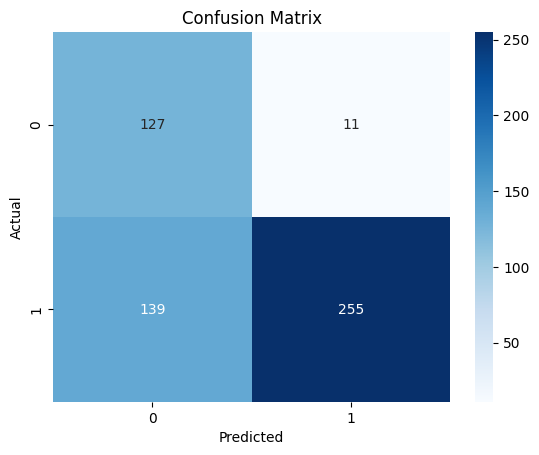

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(confusion_matrix):
    # Create a heatmap using the confusion matrix
    sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='d')

    # Set the axis labels
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    # Add a title
    plt.title('Confusion Matrix')

    # Show the plot
    plt.show()

# Example usage
plot_confusion_matrix(confusion_matrix)

In [ ]:
def calculate_accuracy(confusion_matrix):
    true_positive = confusion_matrix[0, 0]
    false_positive = confusion_matrix[0, 1]
    false_negative = confusion_matrix[1, 0]
    true_negative = confusion_matrix[1, 1]

    total = true_positive + false_positive + false_negative + true_negative
    accuracy = (true_positive + true_negative) / total

    return accuracy

# Example usage
accuracy = calculate_accuracy(confusion_matrix)
print("Accuracy:", accuracy)

Accuracy: 0.7556390977443609


## algoritmn 2# : Corr-matrix based
recommand hobbies based on the most popular hobbies (with the highest corraltion from the corre matrix)



In [ ]:
column_headers = list(df.columns.values)
print("The Column Header :", column_headers)

The Column Header : ['History', 'Psychology', 'Politics', 'Mathematics', 'Physics', 'Internet', 'PC', 'Economy Management', 'Biology', 'Chemistry', 'Reading', 'Geography', 'Foreign languages', 'Medicine', 'Law', 'Cars', 'Art exhibitions', 'Religion', 'Countryside, outdoors', 'Dancing', 'Musical instruments', 'Writing', 'Passive sport', 'Active sport', 'Gardening', 'Celebrities', 'Shopping', 'Science and technology', 'Theatre', 'Fun with friends', 'Adrenaline sports', 'Pets']


In [ ]:
import numpy as np

# Convert the correlation matrix to a NumPy array
corr_matrix_array = corr_matrix.values

# Iterate over each person in the preferred_hobbies_dict
for person, preferred_hobbies in preferred_hobbies_dict.items():
    # Extract the subset of the correlation matrix for the given hobbies
    given_hobby_indices = [column_headers.index(hobby) for hobby in preferred_hobbies]
    subset_correlation_matrix = corr_matrix_array[given_hobby_indices, :]

    # Calculate the average correlation for each hobby in the subset
    average_correlations = np.mean(subset_correlation_matrix, axis=0)

    # Sort the average correlations in descending order and get the corresponding hobby indices
    sorted_indices = np.argsort(average_correlations)[::-1]

    # Select the top 4 most popular hobbies (excluding those already in person's preferred hobbies)
    popular_hobby_indices = [index for index in sorted_indices if column_headers[index] not in preferred_hobbies][:4]
    popular_hobbies = [column_headers[index] for index in popular_hobby_indices]

   # print(f"Recommended hobbies for {person}: {popular_hobbies}")

    print(f"Person: {person}")
    print(f"Existing Hobbies: {preferred_hobbies}")
    print(f"Recommended Hobbies: {popular_hobbies}")
    print()

Person: 367
Existing Hobbies: ['History', 'Internet', 'PC', 'Foreign languages', 'Cars', 'Countryside, outdoors', 'Passive sport', 'Active sport', 'Science and technology', 'Fun with friends', 'Adrenaline sports']
Recommended Hobbies: ['Geography', 'Physics', 'Politics', 'Law']

Person: 904
Existing Hobbies: ['Internet', 'PC', 'Economy Management', 'Geography', 'Foreign languages', 'Art exhibitions', 'Countryside, outdoors', 'Dancing', 'Active sport', 'Celebrities', 'Fun with friends', 'Adrenaline sports']
Recommended Hobbies: ['Law', 'Cars', 'Shopping', 'Theatre']

Person: 101
Existing Hobbies: ['History', 'Politics', 'Internet', 'Reading', 'Geography', 'Passive sport', 'Fun with friends']
Recommended Hobbies: ['Law', 'Foreign languages', 'Theatre', 'Art exhibitions']

Person: 944
Existing Hobbies: ['History', 'Geography', 'Cars', 'Countryside, outdoors', 'Passive sport', 'Active sport', 'Shopping', 'Science and technology', 'Theatre', 'Fun with friends', 'Pets']
Recommended Hobbies: 

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


evaluation algorithm

In [ ]:
# without confusion metrix
import random

def recommend_hobbies(preferred_hobbies, corr_matrix, column_headers, num_recommendations):
    # Convert the correlation matrix to a NumPy array
    corr_matrix_array = corr_matrix.values

    # Extract the subset of the correlation matrix for the given hobbies
    given_hobby_indices = [column_headers.index(hobby) for hobby in preferred_hobbies]
    subset_correlation_matrix = corr_matrix_array[given_hobby_indices, :]

    # Calculate the average correlation for each hobby in the subset
    average_correlations = np.mean(subset_correlation_matrix, axis=0)

    # Sort the average correlations in descending order and get the corresponding hobby indices
    sorted_indices = np.argsort(average_correlations)[::-1]

    # Select the top N most popular hobbies (excluding those already in person's preferred hobbies)
    recommended_hobbies = [column_headers[index] for index in sorted_indices if column_headers[index] not in preferred_hobbies][:num_recommendations]

    return recommended_hobbies

def evaluate_recommendation_algorithm(recommend_hobbies, preferred_hobbies_dict_test, corr_matrix, column_headers, num_recommendations):
    success_count = 0
    total_count = 0

    for person, preferred_hobbies in preferred_hobbies_dict_test.items():
        print(f"Person: {person}")
        print("Original Record:")
        print(f"Hobbies: {preferred_hobbies}")

        modified_hobbies = preferred_hobbies.copy()

        # Calculate the number of hobbies to delete (30% of the original size)
        num_deletions = int(len(preferred_hobbies) * 0.4)

        if len(modified_hobbies) > num_deletions:
            # Remove a random number of hobbies from the modified list
            deleted_hobbies = random.sample(modified_hobbies, num_deletions)
            modified_hobbies = [hobby for hobby in modified_hobbies if hobby not in deleted_hobbies]
        else:
            deleted_hobbies = []

        # Print the modified record
        print(f"Modified Hobbies: {modified_hobbies}")

        # Run the recommendation algorithm on the modified list
        recommended_hobbies = recommend_hobbies(modified_hobbies, corr_matrix, column_headers, num_recommendations)

        # Print the recommended hobbies
        print(f"Recommended Hobbies: {recommended_hobbies}")
        print()

        # Check if any of the deleted hobbies are present in the recommended hobbies
        if any(hobby in deleted_hobbies for hobby in recommended_hobbies):
            success_count += 1

        total_count += 1

    success_rate = success_count / total_count

    return success_rate


# Example usage
num_recommendations = 6


success_rate = evaluate_recommendation_algorithm(recommend_hobbies, preferred_hobbies_dict_test, corr_matrix, column_headers, num_recommendations)

print("Success Rate:", success_rate)

Person: 47
Original Record:
Hobbies: ['Internet', 'Economy Management', 'Reading', 'Foreign languages', 'Shopping', 'Theatre', 'Fun with friends', 'Pets']
Modified Hobbies: ['Internet', 'Foreign languages', 'Shopping', 'Theatre', 'Fun with friends']
Recommended Hobbies: ['Art exhibitions', 'Dancing', 'Celebrities', 'Reading', 'Countryside, outdoors', 'Psychology']

Person: 443
Original Record:
Hobbies: ['History', 'Psychology', 'Politics', 'Reading', 'Geography', 'Foreign languages', 'Law', 'Religion', 'Passive sport', 'Fun with friends', 'Adrenaline sports']
Modified Hobbies: ['Psychology', 'Reading', 'Geography', 'Foreign languages', 'Law', 'Passive sport', 'Adrenaline sports']
Recommended Hobbies: ['History', 'Politics', 'Art exhibitions', 'Theatre', 'Writing', 'Dancing']

Person: 801
Original Record:
Hobbies: ['Cars', 'Countryside, outdoors', 'Passive sport', 'Active sport', 'Science and technology', 'Fun with friends', 'Adrenaline sports']
Modified Hobbies: ['Cars', 'Countryside, 

In [ ]:
#with confusion metrix
import random
import numpy as np

def recommend_hobbies(preferred_hobbies, corr_matrix, column_headers, num_recommendations):
    # Convert the correlation matrix to a NumPy array
    corr_matrix_array = corr_matrix.values

    # Extract the subset of the correlation matrix for the given hobbies
    given_hobby_indices = [column_headers.index(hobby) for hobby in preferred_hobbies]
    subset_correlation_matrix = corr_matrix_array[given_hobby_indices, :]

    # Calculate the average correlation for each hobby in the subset
    average_correlations = np.mean(subset_correlation_matrix, axis=0)

    # Sort the average correlations in descending order and get the corresponding hobby indices
    sorted_indices = np.argsort(average_correlations)[::-1]

    # Select the top N most popular hobbies (excluding those already in person's preferred hobbies)
    recommended_hobbies = [column_headers[index] for index in sorted_indices if column_headers[index] not in preferred_hobbies][:num_recommendations]

    return recommended_hobbies

def evaluate_recommendation_algorithm(recommend_hobbies, preferred_hobbies_dict_test, corr_matrix, column_headers, num_recommendations):
    # Initialize confusion matrix variables
    true_positive = 0
    false_positive = 0
    true_negative = 0
    false_negative = 0

    for person, preferred_hobbies in preferred_hobbies_dict_test.items():
        print(f"Person: {person}")
        print(f"Original Hobbies: {preferred_hobbies}")

        modified_hobbies = preferred_hobbies.copy()

        # Calculate the number of hobbies to delete (30% of the original size)
        num_deletions = int(len(preferred_hobbies) * 0.4)

        if len(modified_hobbies) > num_deletions:
            # Remove a random number of hobbies from the modified list
            deleted_hobbies = random.sample(modified_hobbies, num_deletions)
            modified_hobbies = [hobby for hobby in modified_hobbies if hobby not in deleted_hobbies]
        else:
            deleted_hobbies = []

        # Print the modified record
        print(f"Modified Hobbies: {modified_hobbies}")

        # Run the recommendation algorithm on the modified list
        recommended_hobbies = recommend_hobbies(modified_hobbies, corr_matrix, column_headers, num_recommendations)

        # Print the recommended hobbies
        print(f"Recommended Hobbies: {recommended_hobbies}")
        print()

        # Check if at least 50% of the original hobbies are recommended
        if len(recommended_hobbies) >= 0.3 * len(preferred_hobbies):
            # At least 50% of the original hobbies are recommended
            true_positive += 1
        else:
            # Less than 50% of the original hobbies are recommended
            false_positive += 1

        if not any(hobby in deleted_hobbies for hobby in recommended_hobbies):
            # None of the deleted hobbies were recommended
            false_negative += 1

    # Calculate true negative as the total number of negative cases minus false positive
    total_negative = len(preferred_hobbies_dict_test) - false_positive
    true_negative = total_negative - true_positive

    # Create the confusion matrix
    confusion_matrix = np.array([[true_positive, false_positive], [false_negative, true_negative]])

    return confusion_matrix


# Example usage
num_recommendations = 5

confusion_matrix = evaluate_recommendation_algorithm(recommend_hobbies, preferred_hobbies_dict_test, corr_matrix, column_headers, num_recommendations)

print("Confusion Matrix:")
print(confusion_matrix)


Person: 47
Original Hobbies: ['Internet', 'Economy Management', 'Reading', 'Foreign languages', 'Shopping', 'Theatre', 'Fun with friends', 'Pets']
Modified Hobbies: ['Internet', 'Economy Management', 'Reading', 'Foreign languages', 'Shopping']
Recommended Hobbies: ['Celebrities', 'Law', 'Theatre', 'Psychology', 'Dancing']

Person: 443
Original Hobbies: ['History', 'Psychology', 'Politics', 'Reading', 'Geography', 'Foreign languages', 'Law', 'Religion', 'Passive sport', 'Fun with friends', 'Adrenaline sports']
Modified Hobbies: ['Psychology', 'Politics', 'Reading', 'Law', 'Religion', 'Passive sport', 'Adrenaline sports']
Recommended Hobbies: ['History', 'Art exhibitions', 'Geography', 'Theatre', 'Foreign languages']

Person: 801
Original Hobbies: ['Cars', 'Countryside, outdoors', 'Passive sport', 'Active sport', 'Science and technology', 'Fun with friends', 'Adrenaline sports']
Modified Hobbies: ['Cars', 'Countryside, outdoors', 'Active sport', 'Science and technology', 'Adrenaline spor

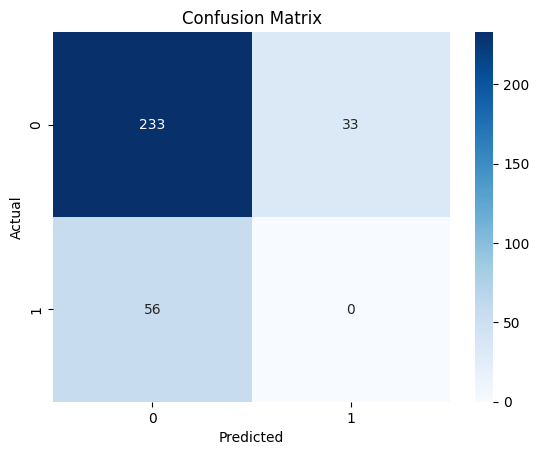

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(confusion_matrix):
    # Create a heatmap using the confusion matrix
    sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='d')

    # Set the axis labels
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    # Add a title
    plt.title('Confusion Matrix')

    # Show the plot
    plt.show()

# Example usage
plot_confusion_matrix(confusion_matrix)



In [ ]:
def calculate_accuracy(confusion_matrix):
    true_positive = confusion_matrix[0, 0]
    false_positive = confusion_matrix[0, 1]
    false_negative = confusion_matrix[1, 0]
    true_negative = confusion_matrix[1, 1]

    total = true_positive + false_positive + false_negative + true_negative
    accuracy = (true_positive + true_negative) / total

    return accuracy

# Example usage
accuracy = calculate_accuracy(confusion_matrix)
print("Accuracy:", accuracy)



Accuracy: 0.7236024844720497


# algorithm 2 additional : optinal

In [ ]:
#popularity count

# Calculate the average rating for each hobby
average_ratings = df.mean()

# Count the number of ratings of 4 or 5 for each hobby
high_ratings_count = (df >= 4).sum()

# Create a DataFrame to store the hobby information
hobby_info = pd.DataFrame({'Average Rating': average_ratings, 'High Ratings Count': high_ratings_count})

# Sort the hobbies based on the average rating in descending order
sorted_hobbies = hobby_info.sort_values(by=['Average Rating', 'High Ratings Count'], ascending=False)

# Print the sorted hobbies, average rating, and high ratings count
for hobby, row in sorted_hobbies.iterrows():
    average_rating = row['Average Rating']
    high_ratings_count = row['High Ratings Count']
    print(f"Hobby: {hobby}, Average Rating: {average_rating:.2f}\n High Ratings Count: {high_ratings_count}")

Hobby: Fun with friends, Average Rating: 4.55
 High Ratings Count: 794.0
Hobby: Internet, Average Rating: 4.18
 High Ratings Count: 681.0
Hobby: Foreign languages, Average Rating: 3.79
 High Ratings Count: 556.0
Hobby: Countryside, outdoors, Average Rating: 3.67
 High Ratings Count: 542.0
Hobby: Passive sport, Average Rating: 3.41
 High Ratings Count: 445.0
Hobby: Pets, Average Rating: 3.33
 High Ratings Count: 454.0
Hobby: Active sport, Average Rating: 3.28
 High Ratings Count: 432.0
Hobby: Shopping, Average Rating: 3.26
 High Ratings Count: 399.0
Hobby: Science and technology, Average Rating: 3.25
 High Ratings Count: 390.0
Hobby: History, Average Rating: 3.21
 High Ratings Count: 369.0
Hobby: Reading, Average Rating: 3.16
 High Ratings Count: 400.0
Hobby: PC, Average Rating: 3.13
 High Ratings Count: 364.0
Hobby: Psychology, Average Rating: 3.12
 High Ratings Count: 357.0
Hobby: Geography, Average Rating: 3.10
 High Ratings Count: 343.0
Hobby: Theatre, Average Rating: 3.03
 High Rat

<h3>matching similar people <h3>

In [ ]:
# Select the columns representing the interests for calculating similarity
interest_columns = df.columns

# Extract the rankings for the interests
rankings = df[interest_columns].values

from sklearn.metrics.pairwise import cosine_similarity

# Compute the similarity matrix using cosine similarity
similarity_matrix = cosine_similarity(rankings)

similar_individuals = {}
for i in range(len(df)):
    # Sort the similarity scores in descending order
    similar_indices = similarity_matrix[i].argsort()[::-1]
    # Exclude the person itself (highest similarity will be with themselves)
    similar_indices = similar_indices[similar_indices != i]
    # Select the top-N similar individuals
    top_n_similar = similar_indices[:4]
    similar_individuals[i] = top_n_similar

for person_index, similar_indices in similar_individuals.items():
    person_id = df.index[person_index]  # Get the person ID using the DataFrame index

    # Get the similarity scores for the similar individuals
    similarity_scores = [similarity_matrix[person_index, index] for index in similar_indices]

    # Get the similar person IDs using the DataFrame index
    similar_ids = [df.index[index] for index in similar_indices]

    # Print the person ID, similar person IDs, and their similarity scores
    print(f"Similar individuals for Person {person_id}:")
    for similar_id, similarity in zip(similar_ids, similarity_scores):
        print(f"   - Person {similar_id} (Similarity: {similarity})")

Similar individuals for Person 0:
   - Person 266 (Similarity: 0.9343342445187806)
   - Person 351 (Similarity: 0.9220519599858175)
   - Person 67 (Similarity: 0.9219493914177219)
   - Person 48 (Similarity: 0.9212738570659983)
Similar individuals for Person 1:
   - Person 433 (Similarity: 0.9397395976908555)
   - Person 995 (Similarity: 0.9325928806294319)
   - Person 1007 (Similarity: 0.9203033059295954)
   - Person 468 (Similarity: 0.9196211999667165)
Similar individuals for Person 2:
   - Person 217 (Similarity: 0.9341742215262788)
   - Person 416 (Similarity: 0.9299385642599428)
   - Person 338 (Similarity: 0.9288452512665193)
   - Person 814 (Similarity: 0.9274257831451073)
Similar individuals for Person 3:
   - Person 405 (Similarity: 0.9072774083116467)
   - Person 59 (Similarity: 0.904724441910062)
   - Person 870 (Similarity: 0.898350117276231)
   - Person 447 (Similarity: 0.8945450393903756)
Similar individuals for Person 4:
   - Person 213 (Similarity: 0.9342414519152664)
 

<h3> CF algorithm <h3>

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics.pairwise import cosine_similarity

# Step 1: Preprocessing
df.dropna(axis=0, inplace=True)
data = df.values

# Split the data into training and test sets
train_ratio = 0.8  # Percentage of data to be used for training
train_size = int(train_ratio * data.shape[0])
train_data = data[:train_size]
test_data = data[train_size:]

# Step 2: Similarity measurement
similarity_matrix = cosine_similarity(train_data)

# Step 3: Nearest neighbors
def get_nearest_neighbors(similarity_matrix, person_index, k):
    person_similarity_scores = similarity_matrix[person_index]
    k_neighbors = np.argsort(person_similarity_scores)[-k-1:-1]
    return k_neighbors

# Step 4: Weighted prediction
def predict_rankings(data, similarity_matrix, new_person_index, k):
    k_neighbors = get_nearest_neighbors(similarity_matrix, new_person_index, k)
    new_person_rankings = data[new_person_index]

    weighted_sum = np.zeros_like(new_person_rankings)
    total_similarity = 0

    for neighbor_index in k_neighbors:
        neighbor_rankings = data[neighbor_index]
        similarity_score = similarity_matrix[new_person_index][neighbor_index]

        weighted_sum += similarity_score * neighbor_rankings
        total_similarity += similarity_score

    predicted_rankings = weighted_sum / total_similarity

    return predicted_rankings

# Step 5: Ranking prediction and accuracy calculation
k = 5  # Number of nearest neighbors to consider

mae_scores = []  # Store MAE scores for each person

for new_person_index in range(len(test_data)):
    predicted_ranking = predict_rankings(train_data, similarity_matrix, new_person_index, k)
    actual_ranking = test_data[new_person_index]

    # Convert predicted rankings to int
    predicted_ranking = np.round(predicted_ranking).astype(int)

    # Calculate MAE
    mae = mean_absolute_error(actual_ranking, predicted_ranking)
    mae_scores.append(mae)

    # Assign rankings to hobbies
    hobbies = list(df.columns.values)  # List of hobby names

    predicted_ranked_hobbies = [(hobby, ranking) for hobby, ranking in zip(hobbies, predicted_ranking)]
    predicted_ranked_hobbies.sort(key=lambda x: x[1], reverse=True)

    actual_ranked_hobbies = [(hobby, ranking) for hobby, ranking in zip(hobbies, actual_ranking)]
    actual_ranked_hobbies.sort(key=lambda x: x[1], reverse=True)

    print(f"Predicted rankings for person {new_person_index + 1}:")
    for rank, (hobby, predicted_ranking) in enumerate(predicted_ranked_hobbies, start=1):
        actual_ranking = actual_ranked_hobbies[rank-1][1]

        print(f"{rank}. {hobby}: Predicted rank={predicted_ranking}, Actual rank={actual_ranking}")

    print(f"MAE: {mae}\n")

# Calculate overall accuracy using average MAE
mean_mae = np.mean(mae_scores)
mean_mae

Streaming output truncated to the last 5000 lines.
5. Geography: Predicted rank=4, Actual rank=4.0
6. Foreign languages: Predicted rank=4, Actual rank=4.0
7. Medicine: Predicted rank=4, Actual rank=4.0
8. Religion: Predicted rank=4, Actual rank=4.0
9. Countryside, outdoors: Predicted rank=4, Actual rank=4.0
10. Musical instruments: Predicted rank=4, Actual rank=3.0
11. Passive sport: Predicted rank=4, Actual rank=3.0
12. Active sport: Predicted rank=4, Actual rank=3.0
13. Shopping: Predicted rank=4, Actual rank=3.0
14. Fun with friends: Predicted rank=4, Actual rank=3.0
15. Adrenaline sports: Predicted rank=4, Actual rank=3.0
16. Pets: Predicted rank=4, Actual rank=3.0
17. Politics: Predicted rank=3, Actual rank=3.0
18. Mathematics: Predicted rank=3, Actual rank=3.0
19. Physics: Predicted rank=3, Actual rank=3.0
20. PC: Predicted rank=3, Actual rank=3.0
21. Economy Management: Predicted rank=3, Actual rank=2.0
22. Chemistry: Predicted rank=3, Actual rank=2.0
23. Reading: Predicted rank

1.2189255617977528